In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import dotenv
from langchain.chat_models import init_chat_model

dotenv.load_dotenv()

GOOGLE_API_KEY = dotenv.load_dotenv("GOOGLE_API_KEY")

In [3]:
llm = init_chat_model("google_genai:gemini-2.5-flash")

E0000 00:00:1759824072.584473 5213682 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [4]:
from typing import Annotated

from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [5]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

In [6]:
graph_builder = StateGraph(State)

In [7]:
def chatbot(state: State):
    return {'messages': [llm.invoke(state['messages'])]}

In [8]:
graph_builder.add_node('chatbot', chatbot)

In [9]:
graph_builder.add_edge(START, 'chatbot')

In [10]:
graph_builder.add_edge('chatbot', END)

In [11]:
graph = graph_builder.compile()

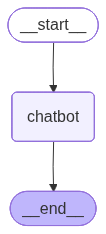

In [12]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [13]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

In [14]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: Hello! How can I help you today?
Assistant: The current President of India is **Droupadi Murmu**.

She assumed office on July 25, 2022.
Assistant: It's important to clarify that India and the United States have not had a direct military conflict or a "win/loss" situation in most other domains. They are strategic partners with strong diplomatic and economic ties.

However, if you are referring to a **sports match**, specifically **cricket**, then it's highly likely India would win against the United States.

Here's why, in the context of cricket:

1.  **Dominance in Cricket:** India is one of the top-ranked and most dominant teams in international cricket. Cricket is a national obsession in India, with a massive talent pool, professional leagues (like the IPL), and a long history of success.
2.  **USA's Developing Cricket:** The United States cricket team is relatively new to the international stage and is still developing. While they are improving and have some talented play

In [1]:
import hashlib

def generate_document_id(doc: str, index: int = 1) -> str:
    """
    Generate deterministic numeric ID with suffix n1, n2, etc.
    
    Args:
        doc (str): The document content
        index (int): Index for uniqueness (default 1)
    
    Returns:
        str: Generated ID, e.g., 748837283n1
    """
    # Step 1: Convert string to bytes
    doc_bytes = doc.encode("utf-8")
    
    # Step 2: Hash the string using MD5 or SHA256
    hash_object = hashlib.md5(doc_bytes)
    
    # Step 3: Convert hash to integer and take first few digits
    hash_int = int(hash_object.hexdigest(), 16)
    hash_str = str(hash_int)[:9]  # take first 9 digits for readability
    
    # Step 4: Append index suffix
    generated_id = f"{hash_str}n{index}"
    
    return generated_id

# Example
doc = "Hello how are you"
print(generate_document_id(doc, 1))  # e.g., 748837283n1
print(generate_document_id(doc, 2))  # e.g., 748837283n2

107886080n1
107886080n2


In [1]:
from sentence_transformers import CrossEncoder

# Example texts
text1 = "I love playing football."
text2 = "Soccer is my favorite sport."

# Load a pre-trained cross-encoder model for semantic similarity
# You can choose any suitable model from: https://huggingface.co/sentence-transformers
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# Input as a list of text pairs
pairs = [[text1, text2]]

# Predict similarity scores
scores = model.predict(pairs)

print(f"Similarity score between text1 and text2: {scores[0]:.4f}")

/Users/poppinadityagmail.com/Developer/GitHub_Codes/mr-helpmate-ai/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Similarity score between text1 and text2: -2.4171


In [2]:
from sentence_transformers import CrossEncoder

# Example texts
text1 = "I love playing football."
text2 = "Soccer is my favorite sport."

# Load a pre-trained cross-encoder model for semantic similarity
# You can choose any suitable model from: https://huggingface.co/sentence-transformers
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# Input as a list of text pairs
pairs = [[text1, text2]]

# Predict similarity scores
scores = model.predict(pairs)

print(f"Similarity score between text1 and text2: {scores[0]:.4f}")

Similarity score between text1 and text2: -2.4171


In [3]:
from sentence_transformers import CrossEncoder

# Example texts
text1 = "I love playing football."
text2 = "Soccer is my favorite sport."

# Load a pre-trained cross-encoder model for semantic similarity
# You can choose any suitable model from: https://huggingface.co/sentence-transformers
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# Input as a list of text pairs
pairs = [[text1, text2]]

# Predict similarity scores
scores = model.predict(pairs)

print(f"Similarity score between text1 and text2: {scores[0]:.4f}")

Similarity score between text1 and text2: -2.4171


In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import time

# Generate random embeddings for testing
embedding_size = 768  # typical embedding size
embedding1 = np.random.rand(embedding_size).astype(np.float32)
embedding2 = np.random.rand(embedding_size).astype(np.float32)

# Optionally, create multiple embeddings to test batch performance
num_embeddings = 1000
embedding_batch = np.random.rand(num_embeddings, embedding_size).astype(np.float32)

# --- Single comparison ---
start = time.time()
sim = cosine_similarity([embedding1], [embedding2])[0][0]
end = time.time()
print(f"Cosine similarity (single pair): {sim:.4f}")
print(f"Time taken (single pair): {end - start:.6f} sec")

# --- Batch comparison (embedding1 vs batch) ---
start = time.time()
sims = cosine_similarity([embedding1], embedding_batch)[0]
end = time.time()
print(f"Cosine similarities (embedding1 vs batch) first 5: {sims[:5]}")
print(f"Time taken (batch of {num_embeddings}): {end - start:.6f} sec")

Cosine similarity (single pair): 0.7607
Time taken (single pair): 0.010707 sec
Cosine similarities (embedding1 vs batch) first 5: [0.7490525 0.7558036 0.7598893 0.7621662 0.7595457]
Time taken (batch of 1000): 0.001645 sec


In [6]:
from sentence_transformers import CrossEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import time

# -------------------------------
# 🔹 Test 1: Cross-Encoder (Text)
# -------------------------------
text1 = "I love playing football."
text2 = "Soccer is my favorite sport."

print("\n=== Cross-Encoder Similarity Test ===")

start = time.time()
# Load pre-trained cross-encoder model for semantic similarity
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# Input as text pairs
pairs = [[text1, text2]]

# Predict similarity scores
scores = model.predict(pairs)
end = time.time()

print(f"Similarity score between text1 and text2: {scores[0]:.4f}")
print(f"Time taken (Cross-Encoder): {end - start:.6f} sec")


# ----------------------------------
# 🔹 Test 2: Embedding Similarity
# ----------------------------------
print("\n=== Embedding Cosine Similarity Test ===")

embedding_size = 768  # typical embedding size
embedding1 = np.random.rand(embedding_size).astype(np.float32)
embedding2 = np.random.rand(embedding_size).astype(np.float32)

# Optionally, create multiple embeddings to test batch performance
num_embeddings = 1000
embedding_batch = np.random.rand(num_embeddings, embedding_size).astype(np.float32)

# --- Single comparison ---
start = time.time()
sim = cosine_similarity([embedding1], [embedding2])[0][0]
end = time.time()
print(f"Cosine similarity (single pair): {sim:.4f}")
print(f"Time taken (single pair): {end - start:.6f} sec")

# --- Batch comparison (embedding1 vs batch) ---
start = time.time()
sims = cosine_similarity([embedding1], embedding_batch)[0]
end = time.time()
print(f"Cosine similarities (embedding1 vs batch) first 5: {sims[:5]}")
print(f"Time taken (batch of {num_embeddings}): {end - start:.6f} sec")

# ----------------------------------
# Summary
# ----------------------------------
print("\n=== Summary ===")
print("Cross-Encoder -> More accurate but slower (good for re-ranking small sets)")
print("Cosine Similarity -> Fast and scalable (ideal for large vector search)")


=== Cross-Encoder Similarity Test ===
Similarity score between text1 and text2: -2.4171
Time taken (Cross-Encoder): 4.874623 sec

=== Embedding Cosine Similarity Test ===
Cosine similarity (single pair): 0.7442
Time taken (single pair): 0.001431 sec
Cosine similarities (embedding1 vs batch) first 5: [0.75799984 0.74224573 0.75904715 0.7564192  0.7476599 ]
Time taken (batch of 1000): 0.001594 sec

=== Summary ===
Cross-Encoder -> More accurate but slower (good for re-ranking small sets)
Cosine Similarity -> Fast and scalable (ideal for large vector search)


In [1]:
from typing import TypedDict, List, Dict, Any, Annotated, Optional
import json

from langgraph.graph import StateGraph, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode

from langchain_core.tools import tool
from langchain_core.messages import AIMessage, ToolMessage, BaseMessage

from src.backend.generation_layer import ChatCompletion
from src.artifacts import SystemInstruction
from src.backend.intent_moderation_check import (IntentCheck,
                                                 ModerationCheck)
from src.database.chromadb_vectorstore import VectorStore
from src.backend.reranker import Reranker


mod_chk = ModerationCheck()
int_cnf = IntentCheck()
chat_completion = ChatCompletion()
vector_store = VectorStore()
reranker = Reranker()


class State(TypedDict, total=False):
    messages: Annotated[List[BaseMessage], add_messages]
    
    input: str
    
    flagged_input: bool
    in_scope: bool
    flagged_output: bool
    
    top_documents: List[str]
    context: str
    
    ai_response: str
    
    
@tool("moderation_check")
def moderation_check_tool(input_message: str) -> bool:
    """ 
    Return True if input_message violates moderation policy; 
    otherwise False.
    """
    return bool(mod_chk.check_moderation(input_message=input_message))

@tool('intent_check')
def intent_check_tool(input_message: str) -> bool:
    """
    Return True if input_message is in scope of allowed intents; otherwise False.
    """
    return bool(int_cnf.check_intent(input_message=input_message))

TOOLS = [moderation_check_tool, intent_check_tool]
tools_node = ToolNode(TOOLS)


def parse_bool_from_tool_content(content: Any) -> bool:
    """
    Robustly parse a boolean-like value from a tool's returned content.
    Handles: True/False, "true"/"false", "True"/"False", 1/0, JSON-encoded, etc.
    """
    if isinstance(content, bool):
        return content
    
    if isinstance(content, (int, float)):
        return content != 0
    
    if isinstance(content, str):
        s = content.strip()
        try:
            loaded = json.loads(s)
            if isinstance(loaded, bool):
                return loaded
            if isinstance(loaded, (int, float)):
                return loaded != 0
            if isinstance(loaded, str):
                s2 = loaded.strip().lower()
                return s2 in ("true", "1", "yes", "y")
        except Exception:
            pass
        
        s = s.lower()
        return s in ("true", "1", "yes", "y")
    
    return bool(content)



def schedule_input_checks(state: State) -> Dict[str, Any]:
    """
    Create an AIMessage that requests tool calls for moderation and intent checks.
    ToolNode will see these tool_calls and execute the tools.
    """
    ai_for_tools = AIMessage(
        content="",
        tool_calls = [
            {
                "name": "moderation_check",
                "args": {
                    "input_message": state["input"]
                },
                "id": "call_moderation_in"
            },
            {
                "name": "intent_check",
                "args": {
                    "input_message": state["input"]
                },
                "id": "call_intent_in"
            },
        ],
    )
    return {"message": [ai_for_tools]}


def parse_input_checks(state: State) -> Dict[str, Any]:
    """ 
    Read ToolMessages corresponding to the input checks and set flags in state.
    We look for tool_call_id 'call_moderation_in' and 'call_intent_in'.
    """
    flagged_input: Optional[bool] = None
    in_scope: Optional[bool] = None
    
    for msg in state.get("messages", []):
        if isinstance(msg, ToolMessage):
            if getattr(msg, "tool_call_id", None) == "call_moderation_in":
                flagged_input = parse_bool_from_tool_content(msg.content)
            elif getattr(msg, "tool_call_id", None) == "call_intent_in":
                in_scope = parse_bool_from_tool_content(msg.content)
        
        if flagged_input is None:
            flagged_input = False
        
        if in_scope is None:
            in_scope = False

    return {"flagged_input": flagged_input, "in_scope": in_scope}


def route_after_input_tools(state: State) -> str:
    if state.get("flagged_input"):
        return "flagged"
    
    if not state.get("in_scope"):
        return "out_of_scope"
    
    return "proceed"


def handle_input_flagged(_: State) -> Dict[str, Any]:
    return {
        "ai_response": "Your Conversation has been flagged!, restarting the conversation."
    }
    
def handle_out_of_scope(_: State) -> Dict[str, Any]:
    return {
        "ai_response": "Your question is out of scope or context, please ask the right question related to the domain."
    }
    
    
def retrieve(state: State) -> Dict[str, Any]:
    result = vector_store.query_from_db(query=state["input"], top_k=10)
    docs = result.get("documents", []) if isinstance(result, dict) else []
    return {"top_documents": docs}


def rerank(state: State) -> Dict[str, Any]:
    documents = state.get("top_documents") or []
    pairs = reranker.rerank_documents(
        documents=documents,
        query=state["input"],
        top_k=3
    )
    reranked_context = ""
    for score, doc in pairs:
        reranked_context += doc + "\n\n\n"
    return {"context": reranked_context}


def call_llm(state: State) -> Dict[str, Any]:
    user_content = state["input"] + "###context:\n" + (state.get("context") or "")
    messages_for_llm = [
        {"role": "system", "content": SystemInstruction.prompt},
        {"role": "user", "content": user_content},
    ]
    ai_response = chat_completion.chat_completion(messages=messages_for_llm)
    return {"ai_response": ai_response}


def schedule_output_moderation(state: State) -> Dict[str, Any]:
    """
    After LLM, schedule a moderation check for the model's response using the same tool.
    """
    ai_for_tools = AIMessage(
        content="",
        tool_calls=[
            {
                "name": "moderation_check",
                "args": {"input_message": state.get("ai_response", "")},
                "id": "call_moderation_out",
            }
        ],
    )
    return {"messages": [ai_for_tools]}


def parse_output_moderation(state: State) -> Dict[str, Any]:
    """
    Parse the result from the output moderation tool call.
    """
    flagged_output: Optional[bool] = None
    for msg in state.get("messages", []):
        if isinstance(msg, ToolMessage) and getattr(msg, "tool_call_id", None) == "call_moderation_out":
            flagged_output = parse_bool_from_tool_content(msg.content)
            break

    if flagged_output is None:
        flagged_output = False

    return {"flagged_output": flagged_output}


def route_after_output_moderation(state: State) -> str:
    return "flagged" if state.get("flagged_output") else "ok"


def handle_output_flagged(_: State) -> Dict[str, Any]:
    return {
        "ai_response": "Your Conversation has been flagged!, restarting the conversation."
    }
    
    
    
def build_graph():
    graph = StateGraph(State)
    
    graph.add_node("schedule_input_checks", schedule_input_checks)
    graph.add_node("tools", tools_node)
    graph.add_node("parse_input_checks", parse_input_checks)
    graph.add_node("handle_input_flagged", handle_input_flagged)
    graph.add_node("handle_out_of_scope", handle_out_of_scope)
    
    graph.add_node("retrieve", retrieve)
    graph.add_node("rerank", rerank)
    graph.add_node("call_llm", call_llm)
    
    graph.add_node("schedule_output_moderation", schedule_output_moderation)
    graph.add_node("parse_output_moderation", parse_output_moderation)
    graph.add_node("handle_output_flagged", handle_output_flagged)
    
    graph.set_entry_point("schedule_input_checks")
    
    graph.add_edge("schedule_input_checks", "tools")
    graph.add_edge("tools", "parse_input_checks")
    graph.add_conditional_edges(
        "parse_input_checks",
        route_after_input_tools,
        {
            "flagged": "handle_input_flagged",
            "out_of_scope": "handle_out_of_scope",
            "proceed": "retrieve",
        },
    )
    
    graph.add_edge("handle_input_flagged", END)
    graph.add_edge("handle_out_of_scope", END)
    
    # Retrieval → Rerank → LLM
    graph.add_edge("retrieve", "rerank")
    graph.add_edge("rerank", "call_llm")

    # Output moderation via tools
    graph.add_edge("call_llm", "schedule_output_moderation")
    graph.add_edge("schedule_output_moderation", "tools")
    graph.add_edge("tools", "parse_output_moderation")
    graph.add_conditional_edges(
        "parse_output_moderation",
        route_after_output_moderation,
        {
            "flagged": "handle_output_flagged",
            "ok": END,
        },
    )
    graph.add_edge("handle_output_flagged", END)
    
    return graph.compile()


def main():
    app = build_graph()
    print("Type 'exit', 'bye', or 'end' to quit.")
    while True:
        input_message = input("User: ")
        if input_message in ["exit", "bye", "end"]:
            print("Thank you for your time, hope I helped. Bye!")
            print("Chat Terminated....")
            break

        initial_state: State = {
            "input": input_message,
            "messages": [],  
        }

        result: State = app.invoke(initial_state)

        print("Assistant: ", result.get("ai_response", ""))
        print("\n\n")
        
if __name__ == "__main__":
    pass

/Users/poppinadityagmail.com/Developer/GitHub_Codes/mr-helpmate-ai/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


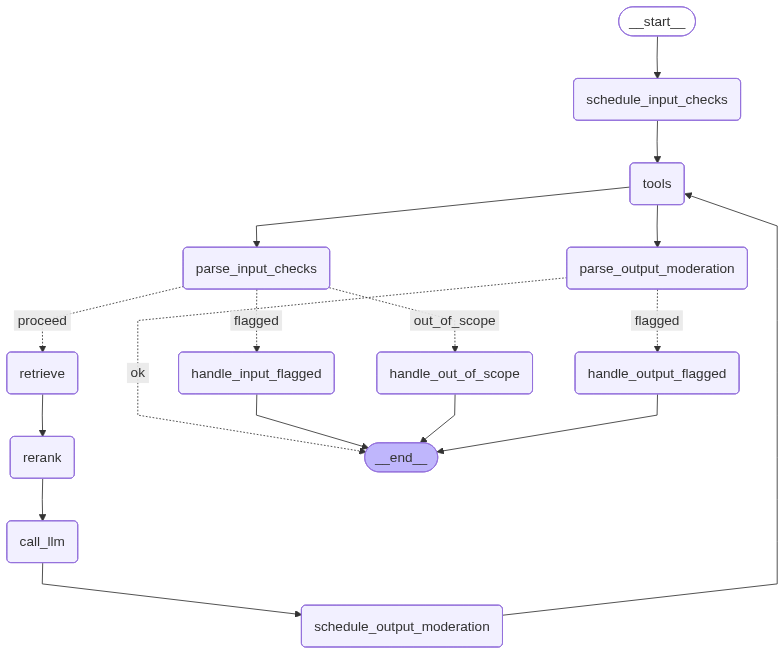

In [2]:
from IPython.display import Image, display

try:
    display(Image(build_graph().get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass